# Manipulating FileFunction Spectra

This tutorial demonstrates some of the methods that can be used to manipulate FileFunction sources in fermipy.  For this example we'll use the draco analysis.

In [1]:
import os
if os.path.isfile('../data/draco.tar.gz'):
    !tar xzf ../data/draco.tar.gz
else:
    !curl -OL --output-dir ./../data/ https://raw.githubusercontent.com/fermiPy/fermipy-extras/master/data/draco.tar.gz
    !tar xzf ./../data/draco.tar.gz


In [2]:
import matplotlib.pyplot as plt
import numpy as np

from fermipy.gtanalysis import GTAnalysis
gta = GTAnalysis('draco/config.yaml')
gta.setup()

2024-08-17 15:31:19 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 1.2.2 
ScienceTools version 2.2.0
2024-08-17 15:31:20 INFO    GTAnalysis.setup(): Running setup.
2024-08-17 15:31:20 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2024-08-17 15:31:20 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2024-08-17 15:31:20 INFO    GTBinnedAnalysis.setup(): Using external LT cube.


{'Prefactor': 0, 'Index1': 1, 'Scale': 2, 'Cutoff': 3, 'Index2': 4}


2024-08-17 15:31:21 INFO    GTBinnedAnalysis._create_expcube(): Skipping gtexpcube.
Set MJD-OBS to 54682.655283 from DATE-OBS.
Set MJD-END to 56874.155007 from DATE-END'. [astropy.wcs.wcs]
2024-08-17 15:31:21 INFO    GTBinnedAnalysis._create_srcmaps(): Skipping gtsrcmaps.
2024-08-17 15:31:21 INFO    GTBinnedAnalysis.setup(): Finished setup for component 00
2024-08-17 15:31:21 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2024-08-17 15:31:34 INFO    GTAnalysis.setup(): Initializing source properties
2024-08-17 15:31:40 INFO    GTAnalysis.setup(): Finished setup.


By default all sources are initialized with parametric spectral models (PowerLaw, etc.).  The spectral model of a source an be updated by calling ``set_source_spectrum()``.

In [3]:
print(gta.roi['3FGL J1725.3+5853'])

Name           : 3FGL J1725.3+5853
Associations   : ['3FGL J1725.3+5853', '7C 1724+5854', '2FGL J1725.2+5853']
RA/DEC         :    261.332/    58.887
GLON/GLAT      :     87.497/    33.997
TS             : nan
Npred          : 278.21
Flux           : 9.942e-10 +/-      nan
EnergyFlux     : 2.323e-06 +/-      nan
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  1.627e-13 +/-        nan
b'Index'       :     -2.179 +/-        nan
b'Scale'       :       1701 +/-        nan


Running ``set_source_spectrum()`` with no additional arguments will substitute the source spectrum with a FileFunction with the same distribution in differential flux.  The normalization parameter is defined such that 1.0 corresponds to the normalization of the original source spectrum.  

In [4]:
gta.set_source_spectrum('3FGL J1725.3+5853','FileFunction')
print(gta.roi['3FGL J1725.3+5853'])

Name           : 3FGL J1725.3+5853
Associations   : ['3FGL J1725.3+5853', '7C 1724+5854', '2FGL J1725.2+5853']
RA/DEC         :    261.332/    58.887
GLON/GLAT      :     87.497/    33.997
TS             : 286.20
Npred          : 278.21
Flux           : 9.942e-10 +/-      nan
EnergyFlux     : 2.323e-06 +/-      nan
SpatialModel   : PointSource
SpectrumType   : FileFunction
Spectral Parameters
b'Normalization':          1 +/-          0


The differential flux of a FileFunction source can be accessed or modified at runtime by calling the ``get_source_dfde()`` and ``set_source_dfde()`` methods:

60946.41175392648
61037.23412266739


<Figure size 640x480 with 0 Axes>

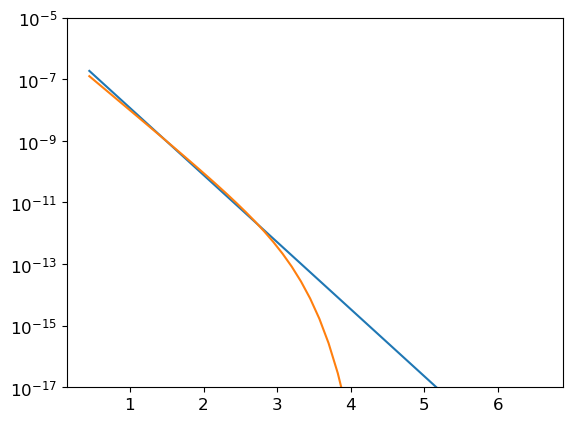

In [5]:
x, y = gta.get_source_dnde('3FGL J1725.3+5853')
y1 = 1E-12*10**(-2.0*(x-3.0))*np.exp(-10**(x-3.0))

plt.clf()
plt.figure()
plt.plot(x,y)
plt.plot(x,y1)
plt.gca().set_yscale('log')
plt.gca().set_ylim(1E-17,1E-5)
print(gta.like())
gta.set_source_dnde('3FGL J1725.3+5853',y1)
print(gta.like())
plt.show()

Calling ``set_source_spectrum()`` with the optional dictionary argument can be used to explicitly set the parameters of the new spectral model.  

In [6]:
gta.set_source_spectrum('3FGL J1725.3+5853','PowerLaw',{'Index' : {'value' : -2.179}, 'Scale' : {'value' : 1701}, 'Prefactor' : {'value' : 1.627e-13}})
gta.like()

60946.40599616774